<a href="https://colab.research.google.com/github/radhakrishnan-omotec/football-repo/blob/main/Practice_Project_Football_Goal_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practice Project - Football Goal Prediction**

# Abstract:

- The study aims to implement for the Data Analysis Expected Goals project.

In [1]:
!git clone https://github.com/radhakrishnan-omotec/football-repo.git

Cloning into 'football-repo'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (12/12), 772.79 KiB | 2.96 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [2]:
import torch
torch.cuda.is_available()
device=torch.device("cuda:0")
device
if torch.cuda.is_available():
  device=torch.device("cuda:0")
  print("running on gpu")
else:
  device=torch.device("cpu")
  print("running on cpu")

torch.cuda.device_count()

running on cpu


0

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("/content/football-repo/Predicting the Price of a Football Player.csv")

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2,France,0,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.90%,16,1,England,0,1,20,0,1


In [7]:
data['fpl_sel'] = data['fpl_sel'].replace('%','',regex=True).astype('float')/10

In [8]:
data

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,1.71,264,3,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,0.56,167,2,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,0.59,134,2,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,0.15,122,1,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.07,121,2,France,0,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.04,38,2,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.02,34,4,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.03,29,1,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,0.59,16,1,England,0,1,20,0,1


In [9]:
output_var = 'market_value'

In [10]:
import numpy as np
X = data[data.columns[~data.columns.isin([output_var])]]
y = data[[output_var]]

from sklearn.model_selection import train_test_split
np.random.seed(37) # Set seed
x_train, x_test = train_test_split(X, test_size = 0.25)

## dont using iloc as we have projected from data
y_train = y.loc[x_train.index.values]
y_test = y.loc[x_test.index.values]
x_train = X.loc[x_train.index.values, :]
x_test = X.loc[x_test.index.values, :]

In [11]:
print("y_train :: " , y_train)
print("y_test :: " , y_test)
print("x_train :: " , x_train)
print("x_test :: " , x_test)

y_train ::       market_value
1            50.0
366           1.0
260          50.0
3            20.0
265          30.0
..            ...
437           1.5
251          30.0
332           7.0
363           3.0
399           2.0

[345 rows x 1 columns]
y_test ::       market_value
335          15.0
334          11.0
350           1.0
346          15.0
385          12.0
..            ...
240          65.0
174           1.0
267          30.0
326           3.5
253          22.0

[116 rows x 1 columns]
x_train ::                name               club  age position  position_cat  page_views  \
1       Mesut Ozil            Arsenal   28       AM             1        4395   
366  Ã€ngel Rangel            Swansea   34       RB             3         137   
260  Romelu Lukaku  Manchester+United   24       CF             1        3727   
3     Theo Walcott            Arsenal   28       RW             1        2393   
265      Juan Mata  Manchester+United   29       AM             1        2280   

In [12]:
concat_train_data = pd.concat([x_train,y_train],axis=1)

In [15]:
concat_train_data.head()

,name,club,age,position,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,market_value
1,Mesut Ozil,Arsenal,28,AM,1,4395,9.5,0.56,167,2,Germany,0,4,1,1,0,50.0
366,Ã€ngel Rangel,Swansea,34,RB,3,137,4.0,1.88,26,2,Spain,0,6,16,0,0,1.0
260,Romelu Lukaku,Manchester+United,24,CF,1,3727,11.5,4.50,221,2,Belgium,0,2,12,1,0,50.0
3,Theo Walcott,Arsenal,28,RW,1,2393,7.5,0.15,122,1,England,0,4,1,1,0,20.0
265,Juan Mata,Manchester+United,29,AM,1,2280,7.0,0.35,102,2,Spain,0,4,12,1,0,30.0


In [13]:
concat_train_data.describe()

,age,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing,market_value
count,345.000000,345.000000,345.000000,345.00000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,26.802899,2.191304,758.075362,5.44058,0.312841,56.011594,2.011594,0.040580,3.208696,10.243478,0.313043,0.139130,10.753333
std,3.862686,1.007781,939.588994,1.32894,0.553236,52.883592,0.985290,0.197601,1.244726,5.866625,0.464405,0.346585,11.801618
min,17.000000,1.000000,3.000000,4.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.250000
25%,24.000000,1.000000,217.000000,4.50000,0.020000,2.000000,1.000000,0.000000,2.000000,5.000000,0.000000,0.000000,3.000000
50%,27.000000,2.000000,456.000000,5.00000,0.100000,49.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000,7.000000
75%,29.000000,3.000000,860.000000,5.50000,0.320000,93.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000,15.000000
max,37.000000,4.000000,7664.000000,12.00000,4.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000,75.000000


In [16]:
concat_train_data.corr()[output_var].sort_values()

<ipython-input-16-b6d2d6afe734>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  concat_train_data.corr()[output_var].sort_values()


position_cat   -0.202518
age            -0.144592
age_cat        -0.116853
club_id        -0.052287
new_foreign     0.097173
region          0.110158
new_signing     0.115376
fpl_sel         0.484164
fpl_points      0.595919
big_club        0.624354
page_views      0.716096
fpl_value       0.771985
market_value    1.000000
Name: market_value, dtype: float64

In [17]:
concat_train_data.dtypes

name             object
club             object
age               int64
position         object
position_cat      int64
page_views        int64
fpl_value       float64
fpl_sel         float64
fpl_points        int64
region            int64
nationality      object
new_foreign       int64
age_cat           int64
club_id           int64
big_club          int64
new_signing       int64
market_value    float64
dtype: object

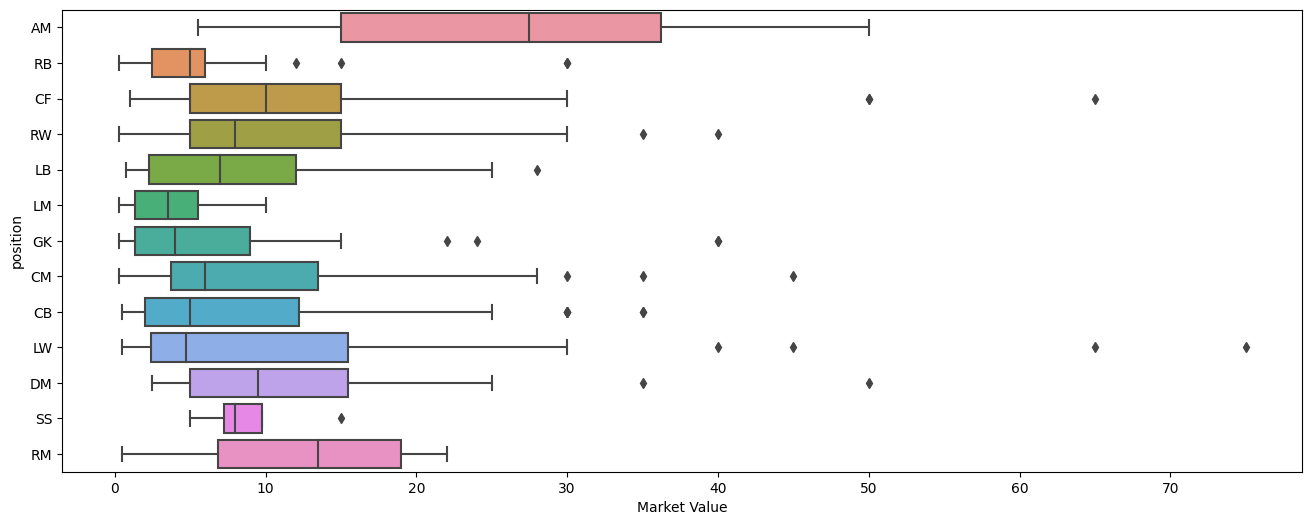

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Setting the size of the figure
plt.figure(figsize=(16, 6))

sns.boxplot(y='position',x=output_var,data=concat_train_data,orient='h')
plt.xlabel("Market Value")
plt.show()

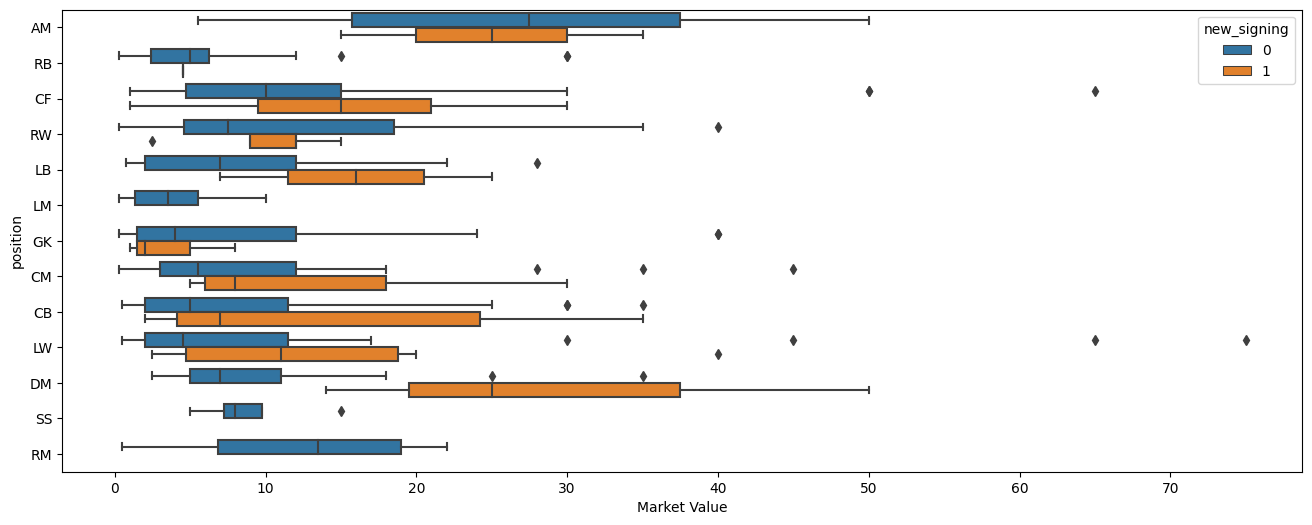

In [21]:
# Setting the size of the figure
plt.figure(figsize=(16, 6))

sns.boxplot(y='position',x='market_value',data=concat_train_data,hue='new_signing',orient='h')
plt.xlabel("Market Value")
plt.show()

In [22]:
encoded_data = pd.get_dummies(concat_train_data, columns=["new_foreign","big_club","new_signing"],drop_first=True)

In [23]:
encoded_data.head()

,name,club,age,position,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,age_cat,club_id,market_value,new_foreign_1,big_club_1,new_signing_1
1,Mesut Ozil,Arsenal,28,AM,1,4395,9.5,0.56,167,2,Germany,4,1,50.0,0,1,0
366,Ã€ngel Rangel,Swansea,34,RB,3,137,4.0,1.88,26,2,Spain,6,16,1.0,0,0,0
260,Romelu Lukaku,Manchester+United,24,CF,1,3727,11.5,4.50,221,2,Belgium,2,12,50.0,0,1,0
3,Theo Walcott,Arsenal,28,RW,1,2393,7.5,0.15,122,1,England,4,1,20.0,0,1,0
265,Juan Mata,Manchester+United,29,AM,1,2280,7.0,0.35,102,2,Spain,4,12,30.0,0,1,0


In [24]:
concat_train_data.corr()[output_var].sort_values()

<ipython-input-24-b6d2d6afe734>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  concat_train_data.corr()[output_var].sort_values()


position_cat   -0.202518
age            -0.144592
age_cat        -0.116853
club_id        -0.052287
new_foreign     0.097173
region          0.110158
new_signing     0.115376
fpl_sel         0.484164
fpl_points      0.595919
big_club        0.624354
page_views      0.716096
fpl_value       0.771985
market_value    1.000000
Name: market_value, dtype: float64

<ipython-input-25-d28c953386e1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = concat_train_data.corr()
<ipython-input-25-d28c953386e1>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),


<Axes: >

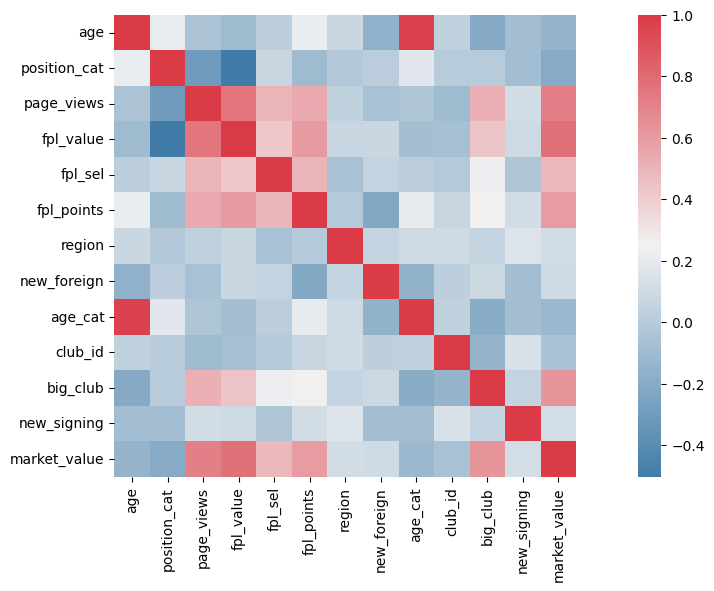

In [25]:
corr = concat_train_data.corr()
import seaborn as sns
import numpy as np

# Setting the size of the figure
plt.figure(figsize=(16, 6))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True)